✅ Dataset loaded successfully.

📄 First 5 rows:
     Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1               75.8      1800           485  

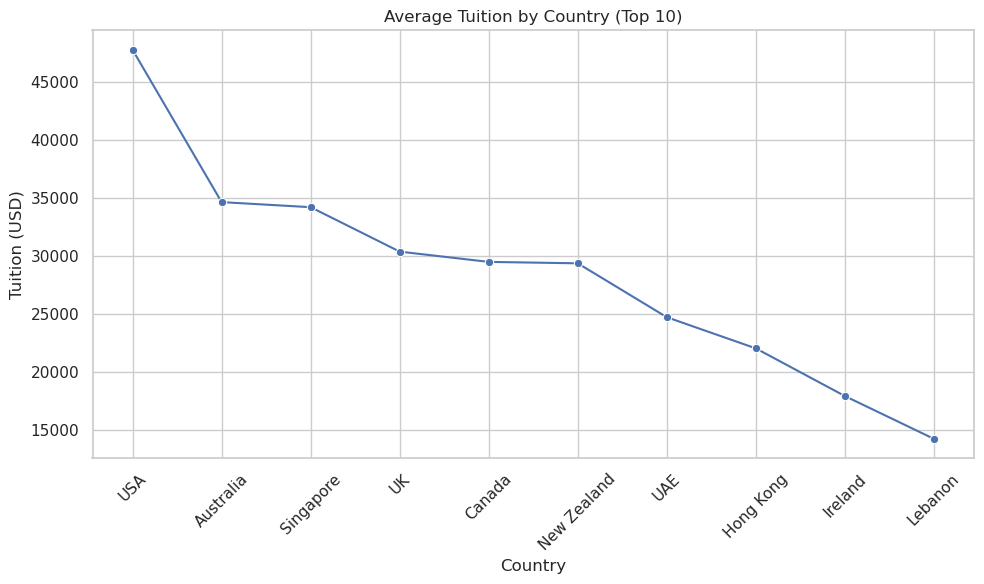

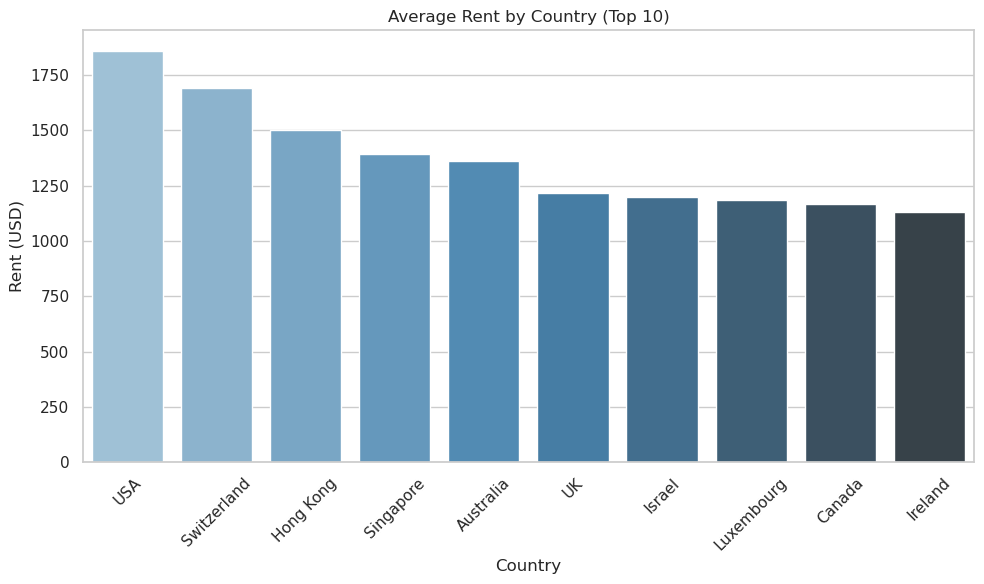

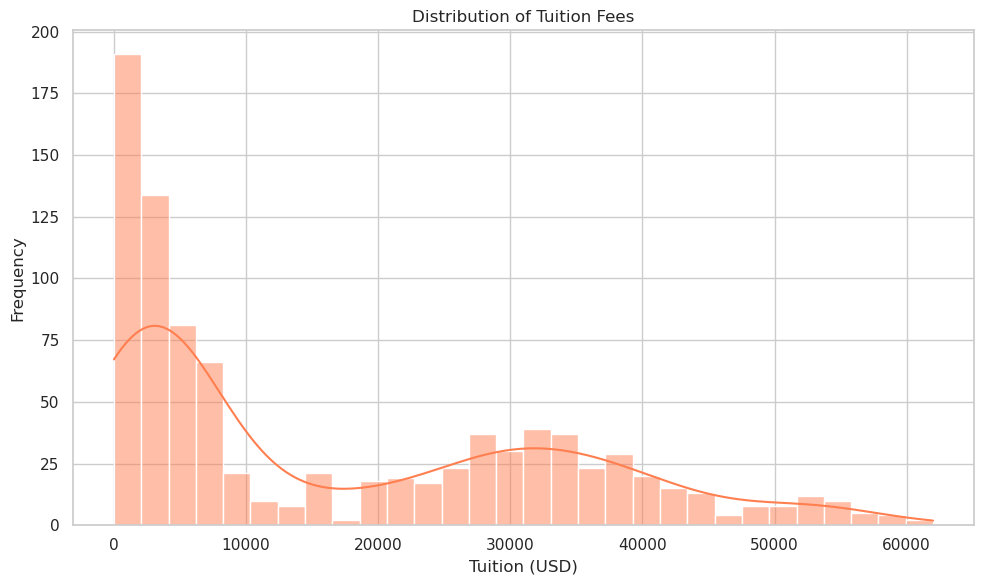

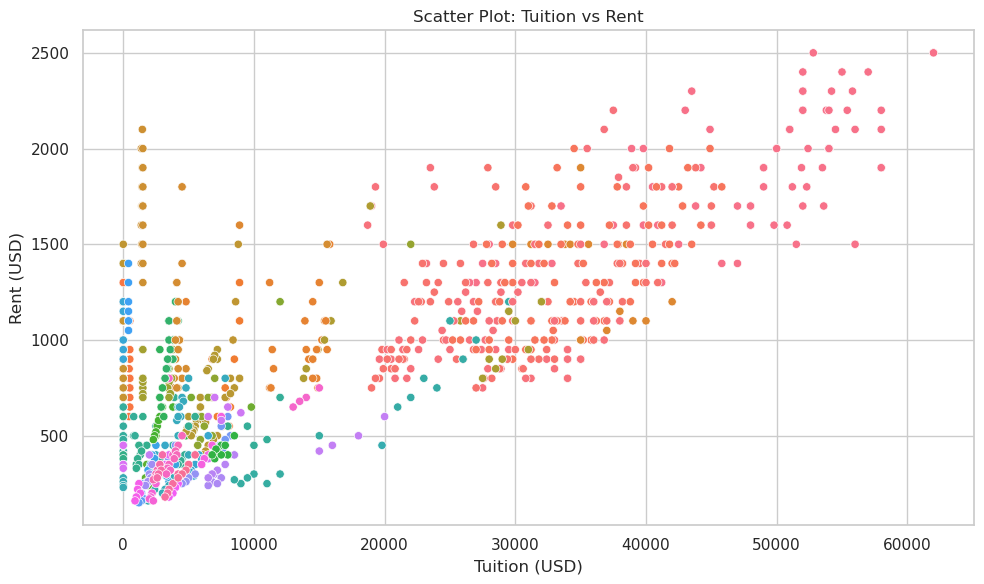

In [3]:
# Task 1: Load and Explore the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1.1 Load the dataset
try:
    df = pd.read_csv("International_Education_Costs.csv")
    print("✅ Dataset loaded successfully.\n")
except FileNotFoundError:
    print("❌ File not found. Please check the file path and name.\n")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

# 1.2 Display the first few rows
print("📄 First 5 rows:")
print(df.head())

# 1.3 Check data types and missing values
print("\n🔍 Data types:")
print(df.dtypes)

print("\n🧼 Missing values:")
print(df.isnull().sum())

# 1.4 Drop missing values
df_cleaned = df.dropna()
print(f"\n✅ Cleaned dataset shape: {df_cleaned.shape}")

# Task 2: Basic Data Analysis

# 2.1 Basic descriptive statistics
print("\n📊 Basic Statistics:")
print(df_cleaned.describe())

# 2.2 Group by Country
mean_tuition_by_country = df_cleaned.groupby("Country")["Tuition_USD"].mean().sort_values(ascending=False)
print("\n💸 Mean Tuition by Country:")
print(mean_tuition_by_country.head(10))

# 2.3 Tuition range by country
tuition_range = df_cleaned.groupby("Country")["Tuition_USD"].agg(['min', 'max', 'mean', 'std']).sort_values(by='mean', ascending=False)
print("\n📈 Tuition Range by Country:")
print(tuition_range.head(10))

# 2.4 Correlation matrix
correlation_matrix = df_cleaned[["Tuition_USD", "Rent_USD", "Visa_Fee_USD", "Insurance_USD", "Living_Cost_Index", "Exchange_Rate"]].corr()
print("\n🔗 Correlation Matrix:")
print(correlation_matrix)

# 2.5 Highest average insurance costs
top_insurance = df_cleaned.groupby("Country")["Insurance_USD"].mean().sort_values(ascending=False)
print("\n🛡️ Highest Insurance Cost by Country:")
print(top_insurance.head(10))

# 2.6 Average study duration per country
avg_duration = df_cleaned.groupby("Country")["Duration_Years"].mean().sort_values(ascending=False)
print("\n📚 Average Study Duration by Country:")
print(avg_duration.head(10))

# 2.7 Lowest tuition countries
lowest_tuition = mean_tuition_by_country.sort_values().head(10)
print("\n🌍 Lowest Average Tuition by Country:")
print(lowest_tuition)

# 2.8 Most affordable countries (lowest tuition + rent)
df_cleaned["Total_Cost"] = df_cleaned["Tuition_USD"] + df_cleaned["Rent_USD"]
mean_total_cost = df_cleaned.groupby("Country")["Total_Cost"].mean().sort_values()
print("\n💰 Most Affordable Countries (Tuition + Rent):")
print(mean_total_cost.head(10))

# Task 3: Data Visualization (Using Seaborn)

# 3.1 Line chart - Tuition
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_tuition_by_country.head(10).index, y=mean_tuition_by_country.head(10).values, marker='o')
plt.title("Average Tuition by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Tuition (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.2 Bar chart - Rent
mean_rent_by_country = df_cleaned.groupby("Country")["Rent_USD"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_rent_by_country.head(10).index, y=mean_rent_by_country.head(10).values, palette='Blues_d')
plt.title("Average Rent by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Rent (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.3 Histogram - Tuition distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Tuition_USD"], bins=30, kde=True, color='coral')
plt.title("Distribution of Tuition Fees")
plt.xlabel("Tuition (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3.4 Scatter plot - Tuition vs Rent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="Tuition_USD", y="Rent_USD", hue="Country", legend=False)
plt.title("Scatter Plot: Tuition vs Rent")
plt.xlabel("Tuition (USD)")
plt.ylabel("Rent (USD)")
plt.tight_layout()
plt.show()
